In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


In [0]:
learning_rate = 0.01
num_steps = 3000
batch_size = 256

In [0]:
display_step = 500
examples_to_show = 10

In [0]:
num_hidden_1 = 256 
num_hidden_2 = 128 
num_input = 784 

In [0]:
X = tf.placeholder("float", [None, num_input])

In [0]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}

In [0]:
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [0]:
def encoder(x):
   
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

In [0]:
def decoder(x):
    
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [0]:
encop = encoder(X)
decop = decoder(encop)

In [0]:
pred = decop
y = X

In [0]:
def ploter(n):
  canvas_orig = np.empty((28 * n, 28 * n))
  canvas_recon = np.empty((28 * n, 28 * n))
  for i in range(n):

      batch_x, _ = mnist.test.next_batch(n)

      g = sess.run(decop, feed_dict={X: batch_x})


      for j in range(n):

          canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])

      for j in range(n):

          canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] =  g[j].reshape([28, 28])

  print("Original Images")
  plt.figure(figsize=(n, n))
  plt.imshow(canvas_orig, origin="upper", cmap="gray")
  plt.show()

  print("Reconstructed Images")
  plt.figure(figsize=(n, n))
  plt.imshow(canvas_recon, origin="upper", cmap="gray")
  plt.show()

In [0]:
loss = tf.reduce_mean(tf.pow(y - pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [0]:
init = tf.global_variables_initializer()

Step 1: Minibatch Loss: 0.437869
Step 500: Minibatch Loss: 0.151903
Step 1000: Minibatch Loss: 0.131582
Step 1500: Minibatch Loss: 0.125814
Step 2000: Minibatch Loss: 0.116823
Step 2500: Minibatch Loss: 0.106551
Step 3000: Minibatch Loss: 0.103564
Original Images


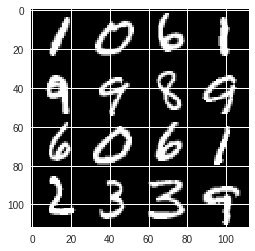

Reconstructed Images


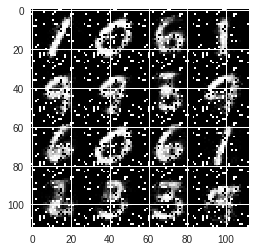

In [64]:
with tf.Session() as sess:

    
    sess.run(init)

   
    for i in range(1, num_steps+1):
        
        batch_x, _ = mnist.train.next_batch(batch_size)

        
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    ploter(4)
   